<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


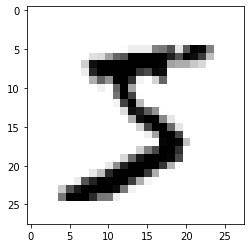

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.cm.binary)

#print(train_images[0])

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential


In [69]:
def build_model(opt='adam'):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(28*28, activation='relu'))
  model.add(Dense(28*28/2, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [68]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_16 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3930      
Total params: 927,090
Trainable params: 927,090
Non-trainable params: 0
_________________________________________________________________


In [54]:
model = build_model()
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.3823 - accuracy: 0.8861 - val_loss: 0.1076 - val_accuracy: 0.9636
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0810 - accuracy: 0.9749 - val_loss: 0.0729 - val_accuracy: 0.9762
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 0.0683 - val_accuracy: 0.9771
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0649 - val_accuracy: 0.9814
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0776 - val_accuracy:

In [67]:
model = build_model()
%time model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=9, batch_size=128)

Epoch 1/9
469/469 [==============================] - 11s 21ms/step - loss: 0.3872 - accuracy: 0.8854 - val_loss: 0.0929 - val_accuracy: 0.9702
Epoch 2/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0777 - accuracy: 0.9763 - val_loss: 0.0729 - val_accuracy: 0.9760
Epoch 3/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 4/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0320 - accuracy: 0.9890 - val_loss: 0.0790 - val_accuracy: 0.9745
Epoch 5/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0776 - val_accuracy: 0.9779
Epoch 6/9
469/469 [==============================] - 10s 20ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0809 - val_accuracy: 0.9784
Epoch 7/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0158 - accuracy: 0.9943 - val_loss: 0.0649 - val_accuracy: 0.9823

In [70]:
model = build_model('rmsprop')
%time model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=9, batch_size=128)

Epoch 1/9
469/469 [==============================] - 10s 20ms/step - loss: 0.3824 - accuracy: 0.8893 - val_loss: 0.0985 - val_accuracy: 0.9702
Epoch 2/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0812 - accuracy: 0.9747 - val_loss: 0.0778 - val_accuracy: 0.9753
Epoch 3/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0662 - val_accuracy: 0.9788
Epoch 4/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 5/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0752 - val_accuracy: 0.9784
Epoch 6/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0671 - val_accuracy: 0.9823
Epoch 7/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0833 - val_accuracy: 0.9800

In [71]:
model = build_model('sgd')
%time model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=9, batch_size=128)

Epoch 1/9
469/469 [==============================] - 11s 22ms/step - loss: 0.3785 - accuracy: 0.8863 - val_loss: 0.1064 - val_accuracy: 0.9660
Epoch 2/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0777 - accuracy: 0.9751 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 3/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0781 - val_accuracy: 0.9769
Epoch 4/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 5/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0674 - val_accuracy: 0.9802
Epoch 6/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0728 - val_accuracy: 0.9816
Epoch 7/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0862 - val_accuracy: 0.9787

In [72]:
model = build_model('adamax')
%time model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=9, batch_size=128)

Epoch 1/9
469/469 [==============================] - 11s 22ms/step - loss: 0.3790 - accuracy: 0.8865 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 2/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0788 - accuracy: 0.9753 - val_loss: 0.0792 - val_accuracy: 0.9736
Epoch 3/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0639 - val_accuracy: 0.9795
Epoch 4/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 5/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.0754 - val_accuracy: 0.9783
Epoch 6/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 7/9
469/469 [==============================] - 10s 21ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0881 - val_accuracy: 0.9773

Saving rLBdQ.jpg to rLBdQ (3).jpg
PREDICTION: This is 2


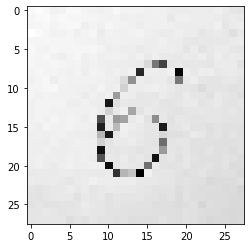

In [66]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from skimage.color import rgb2gray

uploaded = files.upload()

for fn in uploaded.keys(): 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28))  

  x = image.img_to_array(img)
  x = 1 - (rgb2gray(x) / 255)

  plt.imshow(x, cmap=plt.cm.binary)

  x = np.expand_dims(x, axis=0)
  x = np.vstack([x])  

  classes = model.predict(x)

  print('PREDICTION: This is', np.argmax(classes))

In [ ]:
v